['15_49_45']
time 15_49_45


<IPython.core.display.Javascript object>


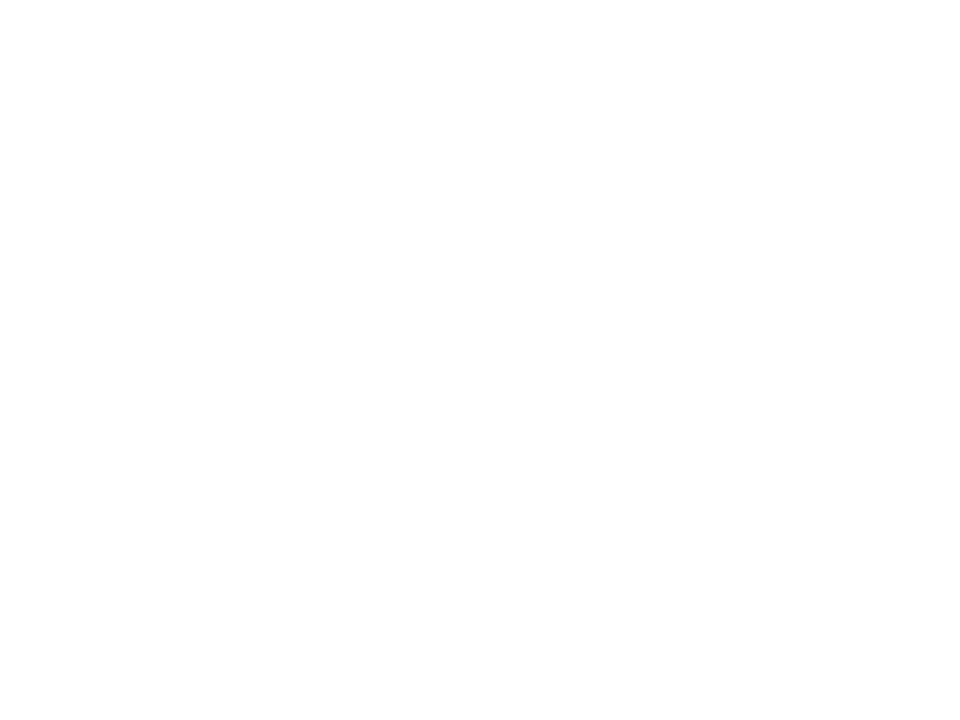

In [196]:
from utilObj0 import *
import matplotlib.pyplot as plt
import numpy as np
import os, errno
import pandas as pd
%matplotlib nbagg

## read in all the channels
# name of the folder & the file
fdname = "071519fly1cell3"
celltype = 'HS'

genotype = 'HScell3' # the stimulus folder
stimulus = 'Edges_light_strips'
#'Sq_12dir_lambda30_1Hz';#'Sine_0_lambda30_mHz'; 'Sine_0_lambda30_ACC' 
#'Sq_LR_12dir_lambda30_1Hz'; #'Sq_LR_12dir_lambda30_1Hz_bgstill_15gap'
#'flowfielddots' #'flowfielddots_dark'; 
# 'yawdots_mHz', # 'yawdots_dark_mHz'
#'Sq_LR_local_4dir'
# 'Sq_PvN_lambda30_1Hz', 'Sq_PvN_lambda30_1Hz_bgstill_15gap'
# 'flashOnOff_mHz','flashOffOn_mHz'
# 'Sine_PDND_lambda30_xHz'
# 'Sine_0_lambda30_1Hz_xC'
# 'Sine_12dir_lambda30_1Hz', 'Sine_12dir_lambda30_1Hz_0.5c'
# 'Edges_light_vel', 'Edges_dark_vel'
# 'Sine_strips_3Hz'

sNo = -1 # the 1st [0] or the 2nd [1] of the 2
recN = 12 # the number of the recording
spiking = False

year = '2019'
date = fdname[:2]+'_'+fdname[2:4]
fdname = '%s/%s' %(celltype,fdname)

csvroot = "C:/Users/Huayi/Google Drive/Desplan Lab/FuncExpt/3screens/data/%s/%s/%s/%s/" %(genotype,stimulus,year,date)

all_subdirs = [dirnames for (dirpath, dirnames, filenames) in os.walk(csvroot)]
if len(all_subdirs[0]) > 2:
    print('check dir')
print(all_subdirs[0])
time = all_subdirs[0][sNo]; print('time %s' %time)

csvpath = csvroot+ '%s/textStimData.csv' %(time)

Raw = RAW(stimulus,fdname,recN,spiking, csvroot, csvpath)
Raw.readtraces()

if spiking: 
    th1 = 0.12 #0.15
    th2 = 5 #2
    th3 = -35
    Raw.detectAP(th1,th2,th3)
else: 
    Raw.spike_idx = None

#plot all data to check on them
ta,tb = 0,len(Raw.t) # range for plotting. 0,len(t) is start to end.
Raw.plotrange(ta,tb)

total epoch number is wrong
122


<IPython.core.display.Javascript object>


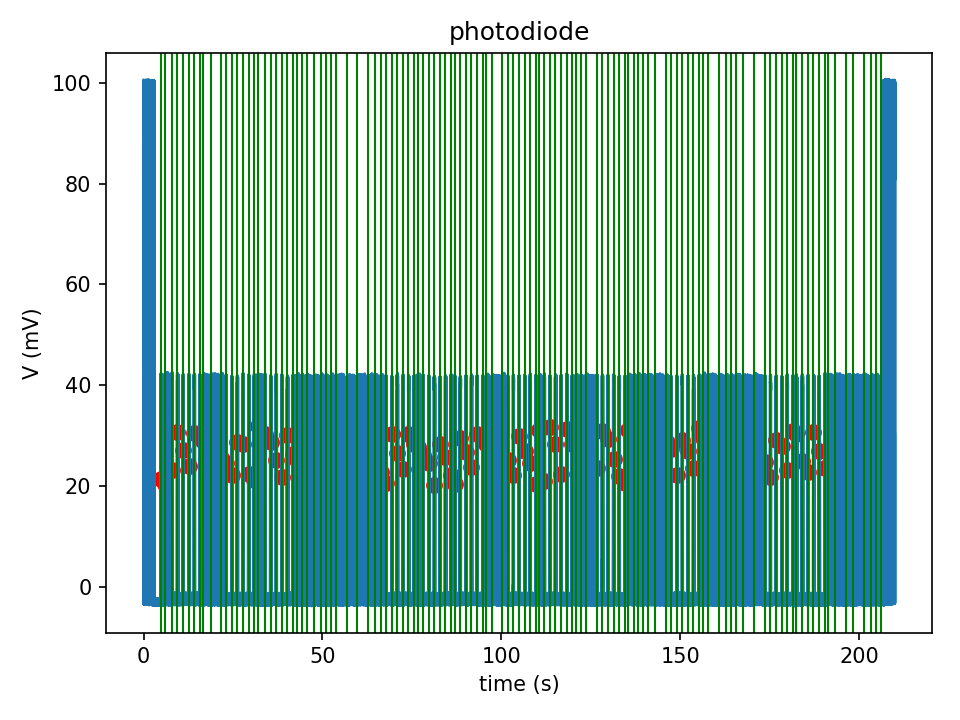

<IPython.core.display.Javascript object>


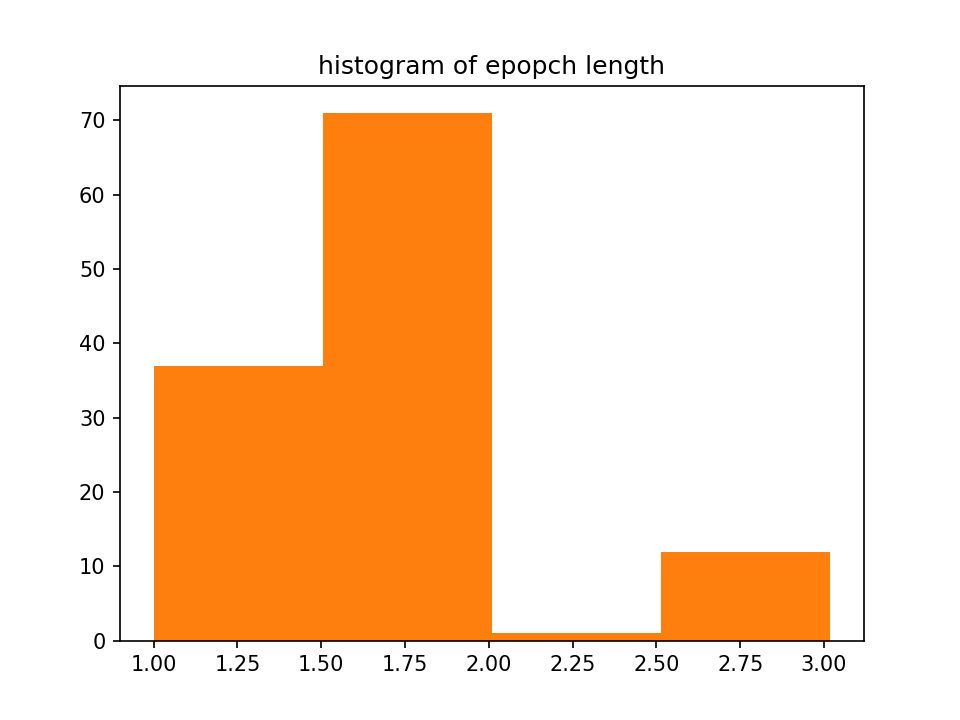

Error: epoch length
(array([37., 71.,  1., 12.]), array([1.0005601 , 1.50501014, 2.00946019, 2.51391024, 3.01836029]), <a list of 4 Patch objects>)
10299826.0
10313178
all saved!


<IPython.core.display.Javascript object>


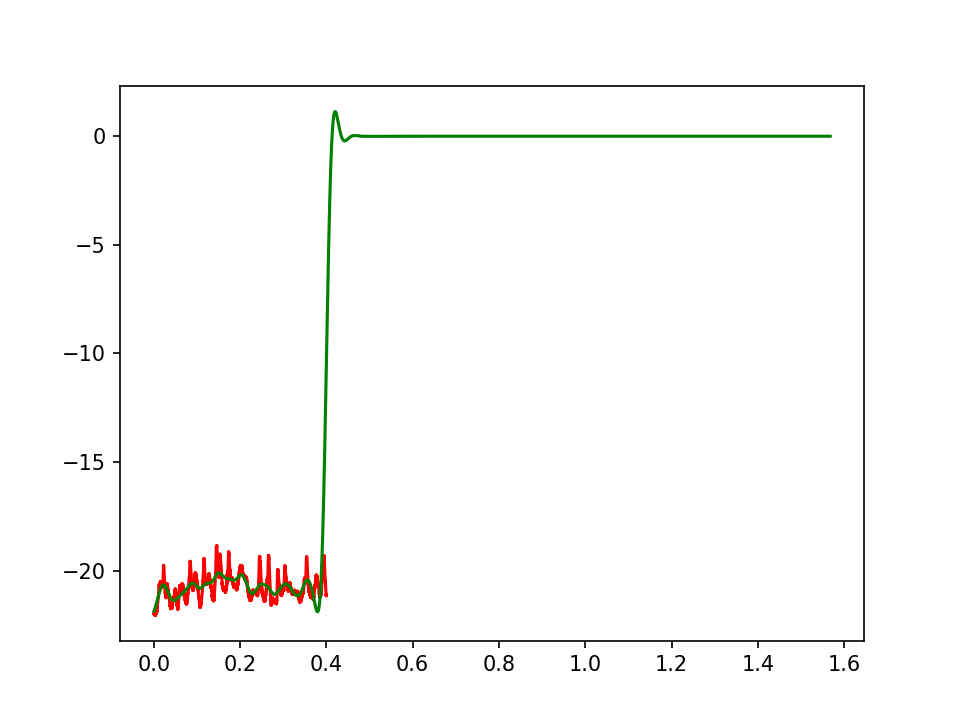

Vdf
     Angles  Locs          0          1          2          3          4  \
6      12.5   -29 -22.289970 -22.289970 -22.289970 -22.276819 -22.276819   
180    12.5   -29 -22.493795 -22.497084 -22.503660 -22.513523 -22.523384   
312    12.5   -29 -22.332706 -22.345858 -22.352432 -22.352432 -22.349146   
18     50.0   -29 -21.826424 -21.833000 -21.842863 -21.846151 -21.839575   
90     50.0   -29 -22.579273 -22.579273 -22.585848 -22.589134 -22.602285   
324    50.0   -29 -22.398457 -22.385309 -22.375444 -22.375444 -22.372158   
0     100.0   -29 -20.613321 -20.626472 -20.636333 -20.636333 -20.639622   
12    100.0   -29 -21.770536 -21.777113 -21.777113 -21.773825 -21.780399   
60    100.0   -29 -22.832415 -22.829126 -22.819263 -22.822552 -22.842276   
114   200.0   -29 -21.816563 -21.809988 -21.803411 -21.800125 -21.800125   
192   200.0   -29 -22.937614 -22.950766 -22.944191 -22.940903 -22.931040   
354   200.0   -29 -21.888887 -21.898750 -21.905327 -21.921762 -21.911901   
24    30

In [197]:
#plt.close()
%matplotlib nbagg
thresh_pho = 20
Raw.epoch_idx,Raw.tepochs = Raw.checkepoch(thresh_pho)


N = 3 # order of filter
Wn = 0.001 # cut off frequency
plt.ioff()
bin_size = 0.05
Vdf,Apdf,T = Raw.save_eps(N, Wn,bin_size)
# chek if the filter works.
n = 20 # the epoch to check 
Raw.checkFilV(n, N, Wn,Apdf,Vdf,T)



In [198]:
# plot Rawtraces with filtV and bins
#plt.ioff()
plot = True
Raw.plotRAW(plot,bin_size,N,Wn,Apdf,Vdf,T)

In [199]:
# plot edge traces 
#-for HS: 1 is NDND,  -1 is PDND, 2 is NDPD,  -2 is PDPD
v_epoch,v_pre,v_mov,v_post,T, dur = Raw.save_eps_Edges()
angles,locs,durs = Raw.findepochnames()
ep_st_idx = np.arange(0,len(locs),6)
locs = np.asarray(locs);angles = np.asarray(angles); 
angs = pd.DataFrame({'angle':angles[ep_st_idx],'loc': locs[ep_st_idx]})
angscp = angs.copy()
angscp = angscp.sort_values(by=['angle','loc'])
dirn = np.insert(np.asarray(AngleGp(angscp.values)),0,0)
for i in [angscp.index.values[dirn[n]:dirn[n+1]] for n in np.arange(len(dirn)-1)]:
    plt.figure()
    for m in i:
        vval = v_epoch[ep_st_idx[m]:ep_st_idx[m]+5].flatten()
        vval = vval[~np.isnan(vval)]; xval = np.arange(len(vval))/50028
        plt.plot(xval,vval, alpha = 0.3)
    [plt.axvline(x=len(xval)/5/50028 * p, color = 'k',  ls =':') for p in np.arange(5)]
    plt.title('Speed:' + str(angscp['angle'][i[0]]) + '. Locs' +  str(angscp['loc'][i[0]]))
    plt.xlabel('t(s)'); plt.ylabel('Membrane potential (mV)')
    plt.savefig('Pics/%s'%fdname+'/'+str(recN) +'/Speed' + str(int(angscp['angle'][i[0]])) + 'Locs' +  str(angscp['loc'][i[0]]) +'.png')
    plt.close()
    


10299826.0
10313178


In [200]:
Avg = AVG(fdname,recN)
blmode = 'None'#'None'#'indi'#None   
plot = True
Vavg = Avg.VMeanStd(blmode,plot)
if spiking:
    Apavg = Avg.ApMeanStd()

all saved!


In [201]:
recL = [recN]
Vset = MergeRecs(fdname,recL,0,'Vavg')
if spiking:
    Apset = MergeRecs(fdname,recL,0,'Apavg')
    Apset_norm = MergeRecs(fdname,recL,1,'Apavg')


all saved!


<IPython.core.display.Javascript object>


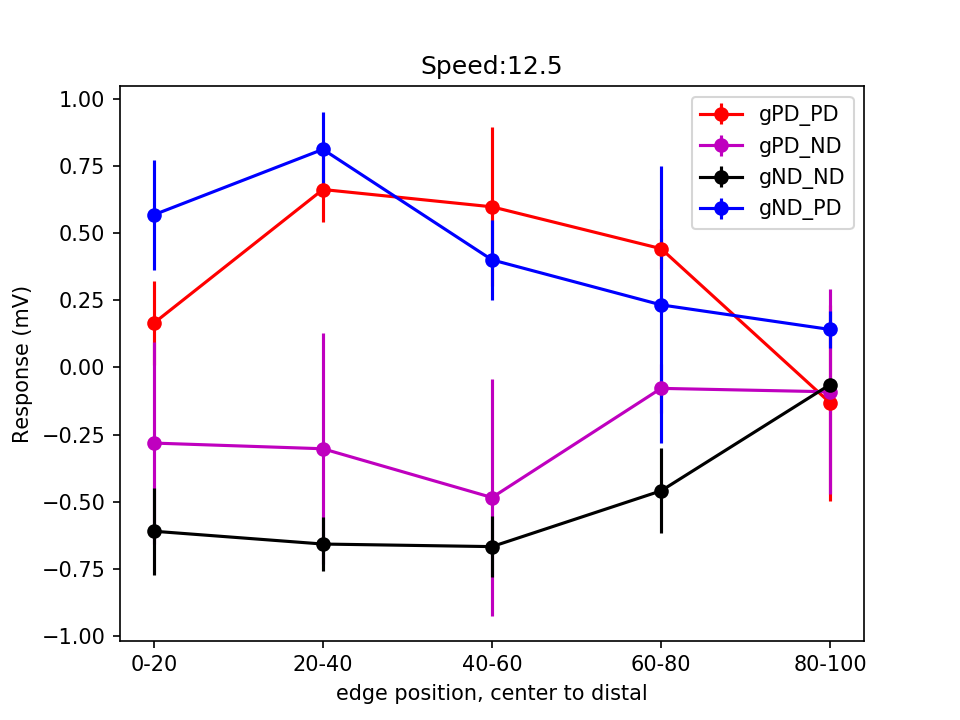

<IPython.core.display.Javascript object>


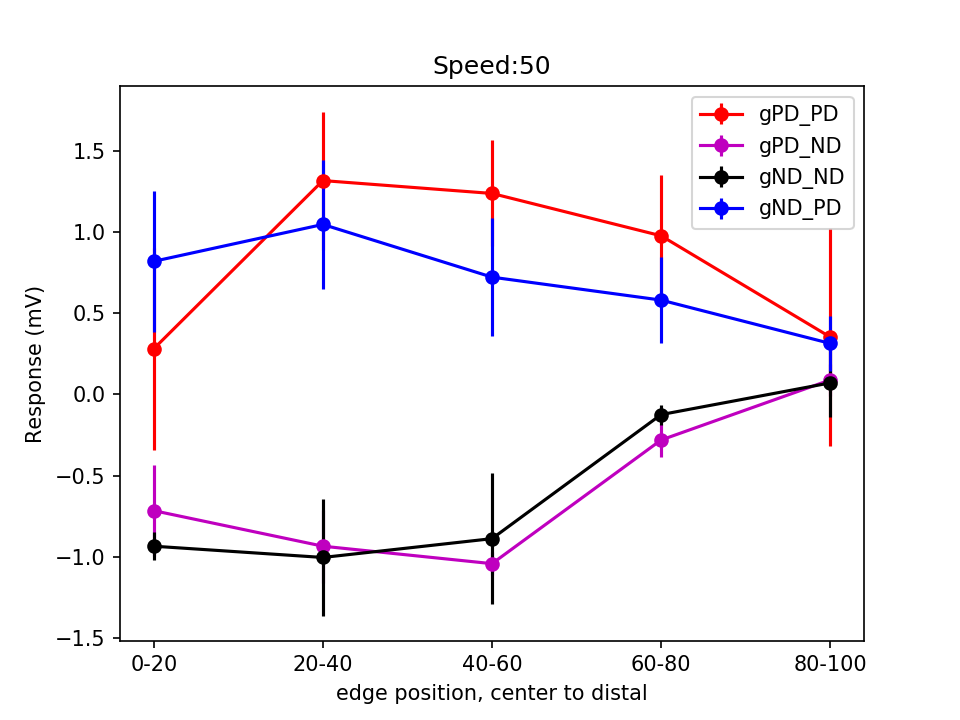

<IPython.core.display.Javascript object>


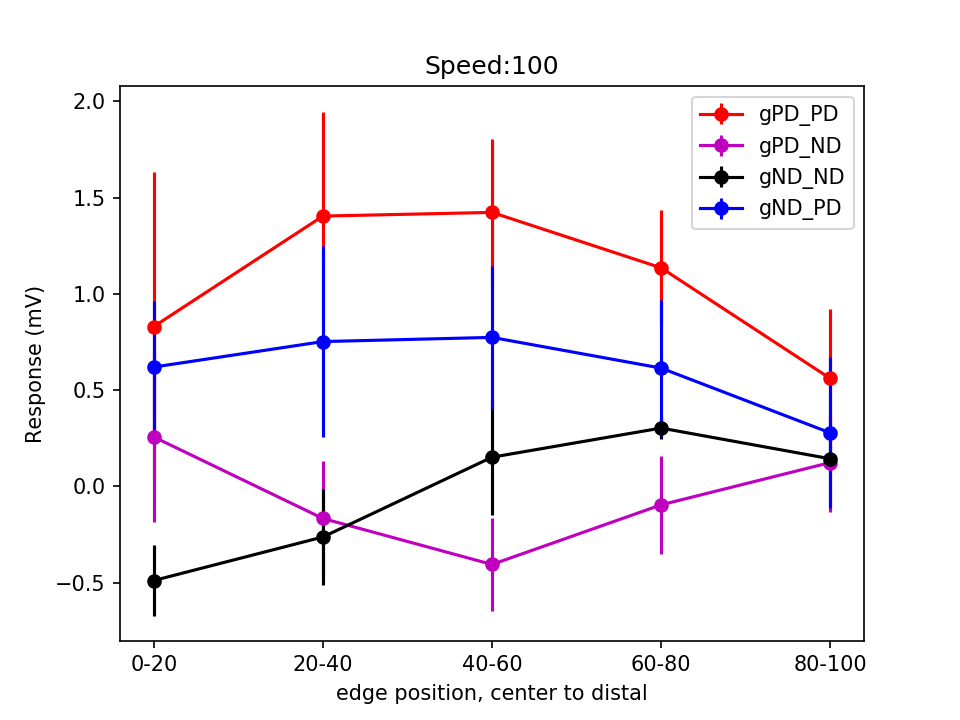

<IPython.core.display.Javascript object>


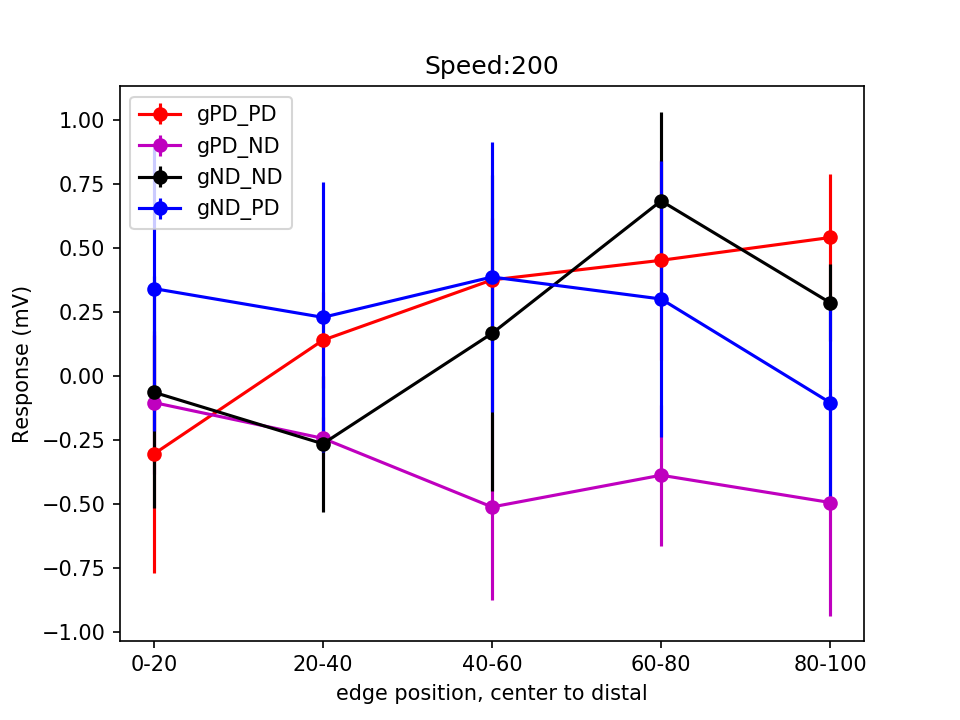

<IPython.core.display.Javascript object>


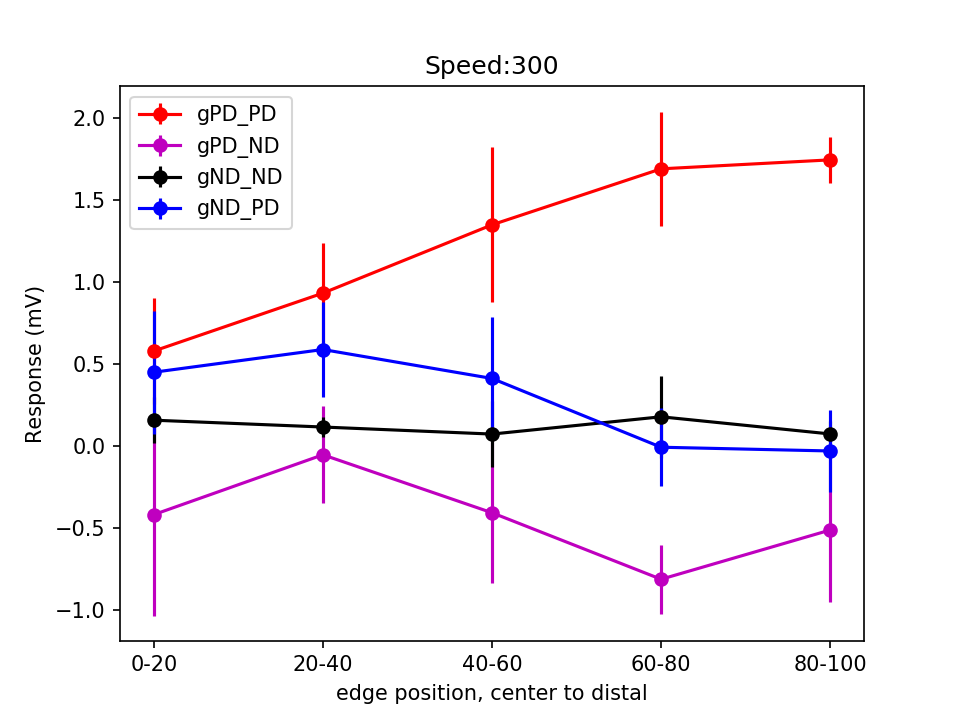

In [202]:
# plot edge strips. Temporary code
angs = pd.DataFrame({'angle': Vavg['ep_names'][:,0],'loc': Vavg['ep_names'][:,1]})
angscp = angs.copy()
angscp = angscp.sort_values(by=['angle','loc'])
Vmov =  Vavg['dmeandf']['Vmovmean'][angscp.index.values]
Vstd =  Vavg['dstddf']['Vmovstd'][angscp.index.values]
for n,i in enumerate([12.5,50,100,200,300]):
    plt.figure()
    plt.errorbar(np.arange(5),Vmov.values[n*20:(n*20+5)], yerr =Vstd.values[n*20:(n*20+5)],marker='o',c = 'r')
    plt.errorbar(np.arange(5),Vmov.values[(n*20+5):(n*20+10)], yerr =Vstd.values[(n*20+5):(n*20+10)],marker='o',c = 'm')
    plt.errorbar(np.arange(5),Vmov.values[(n*20+10):(n*20+15)][::-1], yerr =Vstd.values[(n*20+10):(n*20+15)][::-1],marker='o',c = 'k')
    plt.errorbar(np.arange(5),Vmov.values[(n*20+15):(n*20+20)][::-1], yerr =Vstd.values[(n*20+15):(n*20+20)][::-1],marker='o',c = 'b')
    plt.xticks(np.arange(5),['0-20','20-40','40-60','60-80','80-100']); plt.xlabel('edge position, center to distal')
    plt.legend(['gPD_PD','gPD_ND','gND_ND','gND_PD'])
    plt.title('Speed:' + str(i)); plt.ylabel('Response (mV)')
    plt.savefig('Pics/%s'%fdname+'/%s_rec%splotSpeed%s.jpeg'%(Vset['sti_type'],str(recL),str(i)))
plt.show()

In [203]:
#recN = 17; fdname = 'H2/100818fly1'
#Apset, Apset_norm, Vset = loadset(fdname, recN)
if spiking: 
    pltTune(Vset, spiking, fdname, recN, Apset, Apset_norm)
else:
    pltTune(Vset, spiking, fdname, recN)

In [171]:
# to plot flowfield maps from the patches
RecP = [11,12,15,16]#[16,17,18,19]#[10,11,12,13] #[21,22,23,24]
MPtype = 1; Hz = 1
if spiking:
    VMov, ApMov, ApMov_norm, ApPre, ApPre_norm, Locsdf, xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy = calFMap(RecP, fdname,MPtype, spiking)
    for i,j in zip([VMov, ApMov, ApMov_norm],['Vmov','Apmov','Apmov_norm']): 
    #for i,j in zip([VMov, ApMov - ApPre, ApMov_norm-ApPre_norm],['Vmov','Apmov','Apmov_norm']):
        Vecdf = pltFMap(i,xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy)
        Vecdf.to_csv('Analysis/'+fdname+'/Vec_MT%d_'%MPtype+ str(Hz)+'Hz_'+str(RecP)+'%s.csv'%j)
        plt.title(str(RecP)+j)
        plt.savefig('Pics/'+fdname+'/'+str(RecP)+'%s.png'%j)
        #plt.close()
else:
    VMov, Locsdf, xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy = calFMap(RecP, fdname,MPtype, spiking)
    for i,j in zip([VMov],['Vmov']): 
        Vecdf = pltFMap(i,xf,yf,Locsdf, dirn, stim_dir, xcenters, ycenters, xy)
        Vecdf.to_csv('Analysis/'+fdname+'/Vec_MT%d_'%MPtype+ str(Hz)+'Hz_'+str(RecP)+'%s.csv'%j)
        plt.title(str(RecP)+j)
        plt.savefig('Pics/'+fdname+'/'+str(RecP)+'%s.png'%j)
        #plt.close()



C:\Users\Huayi\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
